In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
rating = pd.read_excel("rating.xlsx", skiprows=1)
df = pd.read_excel("sell_performance.xlsx", skiprows=1, parse_dates=['방송일시'], dayfirst=False)

In [71]:
print(rating.shape)
rating

(1441, 367)


,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003
1,02:01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.012,0.003
2,02:02,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004
3,02:03,0.000,0.000,0.014,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
4,02:04,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.017,0.000,0.000,0.000,0.000,0.000,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,01:56,0.000,0.000,0.000,0.000,0.027,0.000,0.000,0.000,0.000,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1437,01:57,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004
1438,01:58,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.017,0.000,0.000,0.015,0.000,0.000,0.019,0.000,0.004
1439,01:59,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.013,0.000,0.000,0.000,0.015,0.000,0.000,0.000,0.000,0.004


In [13]:
print(df.shape)
df.head()

(38309, 8)


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


\- 노출 NaN은 같은 마더코드로 채워넣기


In [18]:
import datetime as dt

In [19]:
df['방송일시'] = pd.to_datetime(df['방송일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [35]:
df['date']       = df['방송일시'].dt.date         # YYYY-MM-DD(문자)
df['year']       = df['방송일시'].dt.year         # 연(4자리숫자)
df['month']      = df['방송일시'].dt.month        # 월(숫자)
# df['month_name'] = df['방송일시'].dt.month_name() # 월(문자)
df['day']        = df['방송일시'].dt.day          # 일(숫자)
df['time']       = df['방송일시'].dt.time         # HH:MM:SS(문자)
df['hour']       = df['방송일시'].dt.hour         # 시(숫자)
df['minute']     = df['방송일시'].dt.minute       # 분(숫자)

df['판매수량'] = df['취급액']/df['판매단가']

In [68]:
df.drop('year', axis=1)
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,year,month,day,time,hour,minute,판매수량,brand
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,2019,1,1,06:00:00,6,0,52.606516,테이트
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,2019,1,1,06:00:00,6,0,109.548872,테이트
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,2019,1,1,06:20:00,6,20,81.754386,테이트
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,2019,1,1,06:20:00,6,20,174.310777,테이트
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,2019,1,1,06:40:00,6,40,167.218045,테이트


In [69]:
df['상품명'].value_counts()

한일 대용량 스텐 분쇄믹서기                   401
안동간고등어 20팩                        318
무이자 LG전자 매직스페이스 냉장고               308
일시불 LG전자 매직스페이스 냉장고               308
무이자 LG 울트라HD TV 65UK6800HNC       295
                                 ... 
[생쥴랑] 14K 입체 3D 체인 주얼리 11종 컬렉션      2
제옥스  남성 가죽 스니커즈(V)                  2
알비에로 마르티니 1A클라쎄 집어라운드 장지갑           2
(무)한샘 하이바스 내추럴 하부장형                 2
(무)메리츠 올바른 간편보험1810                 1
Name: 상품명, Length: 1770, dtype: int64

In [70]:
df['마더코드'].value_counts()

100148    2618
100837    1507
100448    1308
100205     792
100500     702
          ... 
100703       2
100265       2
100308       2
100519       2
100484       1
Name: 마더코드, Length: 716, dtype: int64

In [30]:
df['month'].value_counts()

5     3634
4     3486
7     3393
3     3293
9     3223
8     3217
10    3202
12    3152
6     3076
11    2931
1     2888
2     2814
Name: month, dtype: int64

In [32]:
df['노출(분)'].value_counts()

20.000000    19052
30.000000     1064
10.000000      762
15.000000      117
30.100000       99
             ...  
14.700000        1
6.666667         1
12.000000        1
40.000000        1
5.333333         1
Name: 노출(분), Length: 103, dtype: int64

In [34]:
df['판매수량'].describe()

count    37372.000000
mean       298.012139
std        422.227096
min          0.006305
25%         19.148208
50%        110.097171
75%        425.476597
max       8070.401003
Name: 판매수량, dtype: float64

In [40]:
# 어느 달에 판매 실적이 가장 좋은가?
df.groupby('month')['취급액'].sum()
df.groupby('month')['판매수량'].sum()

month
1     9.446756e+05
2     7.504978e+05
3     8.155749e+05
4     7.610234e+05
5     8.702882e+05
6     8.740217e+05
7     9.578300e+05
8     1.065119e+06
9     9.483786e+05
10    9.991663e+05
11    1.011114e+06
12    1.139620e+06
Name: 판매수량, dtype: float64

In [45]:
# 몇 시에 판매 실적이 가장 좋은가?
df.groupby('time')['취급액'].sum() # return type : Series
df.groupby('time')['판매수량'].sum()

time
00:00:00     86028.615979
00:10:00       851.315761
00:20:00     89973.734421
00:30:00     13320.508618
00:40:00    109263.399471
                ...      
23:10:00       115.393258
23:20:00     82698.248140
23:30:00     11384.989339
23:40:00    101169.743835
23:50:00      2145.850803
Name: 판매수량, Length: 149, dtype: float64

In [49]:
# 어느 상품군이 매출이 좋은가?
df.groupby('상품군')['취급액'].sum()
df.groupby('상품군')['판매수량'].sum()

상품군
가구      4.542997e+04
가전      1.001908e+05
건강기능    2.944640e+05
농수축     3.776003e+06
무형      0.000000e+00
생활용품    5.015015e+05
속옷      1.425044e+06
의류      1.667274e+06
이미용     1.046214e+06
잡화      9.252257e+05
주방      1.252997e+06
침구      1.029647e+05
Name: 판매수량, dtype: float64

In [78]:
df[df['상품군']=='무형']

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,year,month,day,time,hour,minute,판매수량,brand
2318,2019-01-25 19:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN,2019-01-25,2019,1,25,19:00:00,19,0,NaN,TCOM_처브치아보험
2845,2019-01-31 18:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN,2019-01-31,2019,1,31,18:00:00,18,0,NaN,TCOM_처브치아보험
3332,2019-02-05 18:00:00,60.000000,100507,201567,TCOM_처브치아보험,무형,0,NaN,2019-02-05,2019,2,5,18:00:00,18,0,NaN,TCOM_처브치아보험
6570,2019-03-09 00:00:00,20.000000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,NaN,2019-03-09,2019,3,9,00:00:00,0,0,NaN,온라인투어
6571,2019-03-09 00:20:00,20.000000,100324,201095,온라인투어 동남아 나트랑/빈펄랜드 (190309),무형,0,NaN,2019-03-09,2019,3,9,00:20:00,0,20,NaN,온라인투어
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2020-01-01,2020,1,1,00:20:00,0,20,NaN,삼성화재
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2020-01-01,2020,1,1,00:40:00,0,40,NaN,삼성화재
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,2020-01-01,2020,1,1,01:00:00,1,0,NaN,삼성화재
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,2020-01-01,2020,1,1,01:20:00,1,20,NaN,더케이


In [64]:
df.groupby('상품군').nunique()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,year,month,day,time,hour,minute,판매수량,brand
상품군,,,,,,,,,,,,,,,,,
가구,586,5,14,114,102,1,63,1710,182,1,11,30,39,13,5,1812,31
가전,1687,3,22,259,165,1,128,3184,302,1,12,31,92,19,9,3412,11
건강기능,651,14,36,56,48,1,31,778,166,1,12,31,66,21,5,788,34
농수축,3709,33,102,152,140,1,34,3769,356,1,12,31,101,21,10,3867,89
무형,937,7,29,82,78,1,1,0,190,2,12,31,70,21,5,0,30
생활용품,1475,27,76,183,169,1,98,2636,282,1,12,31,86,21,6,2728,85
속옷,2896,42,86,238,194,1,26,3748,345,1,12,31,99,21,6,3863,38
의류,3240,28,120,362,281,1,49,4164,355,1,12,31,109,21,6,4305,57
이미용,1270,22,42,64,54,1,14,1286,267,1,12,31,73,21,6,1301,37


In [55]:
import numpy as np
df['brand'] = np.nan
for i in range(len(df['상품명'])):
    df['brand'][i] = df['상품명'][i].split()[0]

/Users/soo._.yonee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/soo._.yonee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
df['brand'].unique()

array(['테이트', '오모떼', 'CERINI', '보코', '크로커다일', '에코라믹', '그렉노먼', '뽕셰프',
       '국내산', '멋진밥상', '비버리힐스폴로클럽', '우리바다', '푸마', '일시불', '무이자', '마리노블',
       '헤스티지', '로베르타', '레이프릴', '벨라홈', '(직매입)', 'NNF', '하늘내린', '안동간고등어',
       'SPC삼립', '바다먹자', '키친플라워', '피시원', '에펨', '천연담아', '엘렌실라', '한일',
       '(도냄)무이자', '(도냄)일시불', '청정수산', '영산포숙성', '노비타', '제주농장', '코이모', '소들녘',
       '스포메틱스', '일시불[가이거]', '무이자[가이거]', '스칼프솔루션', '아문센', '마담팰리스',
       'K-SWISS', '(a4)팽현숙의', '종근당건강', '마리끌레르', '아리스토우', '스위스밀리터리', '도네이',
       '쿠미투니카', '농협안심벌꿀', '에버라스트', '더블유베일', '천수봉명인', '카파', '로이몬스터',
       '임페리얼', '제주', '베지밀', '궁중', '이봉원', '세인트스코트', '도스문도스', '락앤락', '에버홈',
       '몬테밀라노', '메시제이', '씨엔지코리아', '[농협]', '전철우', '[수협]', '올리고', 'AAE',
       '컬럼비아', '남영비비안', '헤스떼벨', '제주바다', '크리스티나앤코', '옛날', '마스케라', '해피콜',
       '구워만든', '크린조이', '국내생산', 'TCOM_처브치아보험', '쓰임', '로벤탈', '장보고', '뉴',
       '엘르', '세균싹', '보루네오', '아키', '특집', '아이넥스', '통째로', '자연산', '파시노',
       '월드컵', '가)세렌셉템버', '루이바셋', '달바', '(일)', '(무)', '강원도양구', '까사마루행거',
       

In [61]:
df.isna().sum()

방송일시          0
노출(분)     16784
마더코드          0
상품코드          0
상품명           0
상품군           0
판매단가          0
취급액         937
date          0
year          0
month         0
day           0
time          0
hour          0
minute        0
판매수량        937
brand         0
dtype: int64

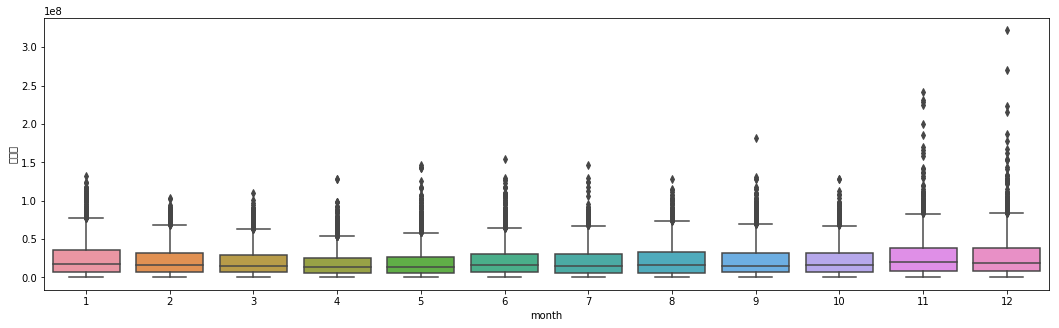

In [62]:
figure,ax1 = plt.subplots()
figure.set_size_inches(18,5)

sns.boxplot(data=df,y='취급액',x='month')